In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [10]:

def calculate_probability(up_move, down_move):
    """
    Calculate the probability of an "up" move to keep the expected value at 1
    after an infinite number of steps.

    Parameters:
    - up_move (float): The multiplier for an "up" move (e.g., 1.1 for a 10% increase).
    - down_move (float): The multiplier for a "down" move (e.g., 0.9 for a 10% decrease).

    Returns:
    - float: The probability of an "up" move.
    """
    if up_move <= 0 or down_move <= 0:
        raise ValueError("Up and down moves must be positive numbers.")
    
    ln_up = math.log(up_move)
    ln_down = math.log(down_move)
    p = -ln_down / (ln_up - ln_down)
    return p

if __name__ == "__main__":
    up_move = float(input("Enter the up move multiplier (e.g., 1.1): "))
    down_move = float(input("Enter the down move multiplier (e.g., 0.9): "))
    try:
        probability = calculate_probability(up_move, down_move)
        print(f"The probability of an 'up' move to keep the value at 1 is: {probability:.4f}")
    except ValueError as e:
        print(f"Error: {e}")


Enter the up move multiplier (e.g., 1.1):  1.1
Enter the down move multiplier (e.g., 0.9):  .9


The probability of an 'up' move to keep the value at 1 is: 0.5250


/var/folders/3v/cffbrkr510z708th2gtn8s600000gn/T/ipykernel_69784/3427495829.py:15: RuntimeWarning: invalid value encountered in scalar divide
  p = -ln_down / (ln_up - ln_down)


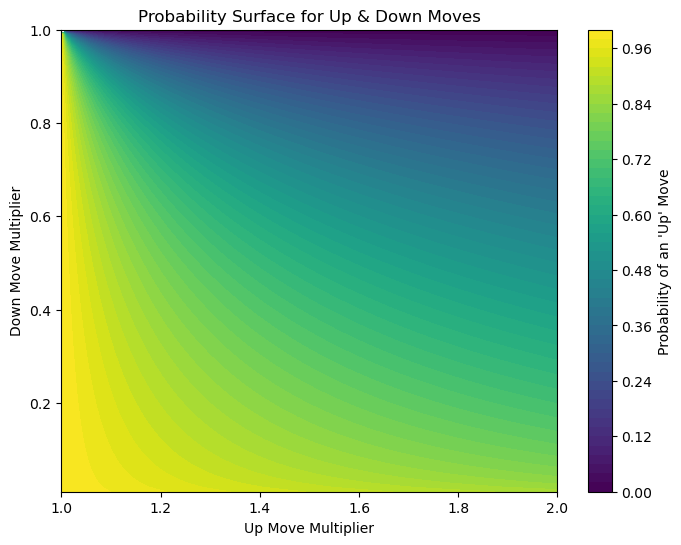

In [8]:
def calculate_probability(up_move, down_move):
    """
    Calculate the probability of an "up" move to keep the expected value at 1
    after an infinite number of steps.
    """
    if up_move <= 0 or down_move <= 0:
        raise ValueError("Up and down moves must be positive numbers.")
    
    ln_up = np.log(up_move)
    ln_down = np.log(down_move)
    p = -ln_down / (ln_up - ln_down)
    return p

# Define the grid resolution
num_points = 100  # 100 discrete points for each variable

# For example: 
# Up move multipliers: from 1.0 (0% change) to 2.0 (+100%)
# Down move multipliers: from 0.01 (almost -100%) to 1.0 (0% change)
up_moves = np.linspace(1.0, 2.0, num_points)
down_moves = np.linspace(0.01, 1.0, num_points)  # avoid 0 to prevent log(0)

# Create a meshgrid for up and down moves
U, D = np.meshgrid(up_moves, down_moves)

# Vectorize the calculation on the grid
# Note: using np.vectorize to apply the function element-wise
calc_prob_vec = np.vectorize(calculate_probability)
P = calc_prob_vec(U, D)

# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.contourf(U, D, P, levels=50, cmap='viridis')
plt.colorbar(label="Probability of an 'Up' Move")
plt.xlabel("Up Move Multiplier")
plt.ylabel("Down Move Multiplier")
plt.title("Probability Surface for Up & Down Moves")
plt.show()
